<a href="https://colab.research.google.com/github/heriswn/LatihanDTS/blob/master/Final_Project_Balancing_SMOTE_(Drop_Size).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> FINAL PROJECT

## <center>Invalid Syntax(]

# Importing Data

In [0]:
import warnings
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv('googleplaystore.csv')

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# Data Preparation

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Checking Data

### Check Data Unique

In [0]:
for colum in data.columns:
    print(colum,':\n',data[colum].unique())
    print()

App :
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

Category :
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Rating :
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

Reviews :
 ['159' '967' '87510' ... '603' '1195' '

In [0]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [0]:
data[data.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Droping Unclear Data

In [0]:
data=data.drop(10472,axis=0)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Missing Value

### Finding Missing Value

In [0]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count+=1

if count>0:
    print(count,'Rows have Missing Value')

1480 Rows have Missing Value


In [0]:
for colum in data.columns:
    missed=data[data[colum].isnull()==True].shape[0]
    if missed>0:
        print('Attribute ',colum,': ',missed)
    else:
        print('Attribute ',colum,': No Missing Value')

Attribute  App : No Missing Value
Attribute  Category : No Missing Value
Attribute  Rating :  1474
Attribute  Reviews : No Missing Value
Attribute  Size : No Missing Value
Attribute  Installs : No Missing Value
Attribute  Type :  1
Attribute  Price : No Missing Value
Attribute  Content Rating : No Missing Value
Attribute  Genres : No Missing Value
Attribute  Last Updated : No Missing Value
Attribute  Current Ver :  8
Attribute  Android Ver :  2


### Replace the Missing Value

In [0]:
for colum in data.columns:
    if (data[data[colum].isnull()].shape[0]>0):
        print('\nAttribute-',colum,' (before) :',data[data[colum].isnull()].shape[0])
        if (data[colum].dtypes in ['int64','float64']):
            data[colum].fillna(data[data[colum].notnull()][colum].mean(), inplace=True)
        else:
            data[colum].fillna(data[data[colum].notnull()][colum].mode(), inplace=True)
        print('\nAttribute-',colum,' (after) :',data[data[colum].isnull()].shape[0])


Attribute- Rating  (before) : 1474

Attribute- Rating  (after) : 0

Attribute- Type  (before) : 1

Attribute- Type  (after) : 1

Attribute- Current Ver  (before) : 8

Attribute- Current Ver  (after) : 8

Attribute- Android Ver  (before) : 2

Attribute- Android Ver  (after) : 2


In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Data Type

### Rating

In [0]:
data.Rating.dtype

dtype('float64')

### Reviews

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [0]:
data.Reviews.dtype

dtype('O')

In [0]:
data.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: object

In [0]:
data.Reviews=data.Reviews.astype('int64')

### Size

In [0]:
data.Size.dtype

dtype('O')

In [0]:
data.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [0]:
k_indices=data.Size.loc[data.Size.str.contains('k')].index.tolist()
converter=pd.DataFrame(data.loc[k_indices,'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

In [0]:
data.Size=data.Size.apply(lambda x: x.strip('M'))
data.Size=data.Size.apply(lambda x: x.strip('Varies with device'))
data.Size=data.Size.replace('','NaN')
data.Size=data.Size.astype('float64')
data.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [0]:
data.Size.value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.932       1
0.556       1
0.628       1
0.539       1
0.660       1
Name: Size, Length: 457, dtype: int64

In [0]:
data=data.dropna()
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Installs

In [0]:
data.Installs.dtype

dtype('O')

In [0]:
data.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835            10+
10836         5,000+
10837           100+
10838         1,000+
10840    10,000,000+
Name: Installs, Length: 9135, dtype: object

In [0]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.astype('int64')
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10835          10
10836        5000
10837         100
10838        1000
10840    10000000
Name: Installs, Length: 9135, dtype: int64

### Price

In [0]:
data.Price.dtype

dtype('O')

In [0]:
data.Price

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10840    0
Name: Price, Length: 9135, dtype: object

In [0]:
data.Price=data.Price.apply(lambda x: x.strip('$'))
data.Price=data.Price.astype('float64')
data.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10835    0.0
10836    0.0
10837    0.0
10838    0.0
10840    0.0
Name: Price, Length: 9135, dtype: float64

In [0]:
data.Installs.value_counts().sort_index()

0               14
1               64
5               78
10             375
50             201
100            701
500            322
1000           871
5000           460
10000         1009
50000          445
100000        1054
500000         491
1000000       1302
5000000        535
10000000       825
50000000       147
100000000      201
500000000       30
1000000000      10
Name: Installs, dtype: int64

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 10840
Data columns (total 13 columns):
App               9135 non-null object
Category          9135 non-null object
Rating            9135 non-null float64
Reviews           9135 non-null int64
Size              9135 non-null float64
Installs          9135 non-null int64
Type              9135 non-null object
Price             9135 non-null float64
Content Rating    9135 non-null object
Genres            9135 non-null object
Last Updated      9135 non-null object
Current Ver       9135 non-null object
Android Ver       9135 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 999.1+ KB


### Labeling Popularity Apps

In [0]:
data['Popularity']=data.apply(lambda row:'Very Not Popular' if (row['Installs']<50) 
                                         else('Not Popular' if ((row['Installs']>=50) and (row['Installs']<5000))
                                              else('Ordinary' if ((row['Installs']>=5000) and (row['Installs']<500000))
                                                   else('Popular' if ((row['Installs']>=500000) and (row['Installs']<50000000))
                                                        else 'Very popular'))),axis=1)

In [0]:
data.Popularity.value_counts()

Popular             3153
Ordinary            2968
Not Popular         2095
Very Not Popular     531
Very popular         388
Name: Popularity, dtype: int64

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Ordinary
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Popular
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Popular
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very popular
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Ordinary
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Ordinary
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Ordinary
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Popular
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Popular
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Ordinary


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 10840
Data columns (total 14 columns):
App               9135 non-null object
Category          9135 non-null object
Rating            9135 non-null float64
Reviews           9135 non-null int64
Size              9135 non-null float64
Installs          9135 non-null int64
Type              9135 non-null object
Price             9135 non-null float64
Content Rating    9135 non-null object
Genres            9135 non-null object
Last Updated      9135 non-null object
Current Ver       9135 non-null object
Android Ver       9135 non-null object
Popularity        9135 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.0+ MB


### Dropping Columns Less Effect

In [0]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Ordinary
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Popular
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Popular
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very popular
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Ordinary
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Ordinary
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Ordinary
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Popular
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Popular
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Ordinary


In [0]:
data=data.drop(columns=['App','Category'],axis=1)
data=data.drop(columns=['Type','Installs'],axis=1)
data=data.drop(columns=['Last Updated','Current Ver','Android Ver'],axis=1)
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000,0.0,Everyone,Art & Design,Ordinary
1,3.900000,967,14.000,0.0,Everyone,Art & Design;Pretend Play,Popular
2,4.700000,87510,8.700,0.0,Everyone,Art & Design,Popular
3,4.500000,215644,25.000,0.0,Teen,Art & Design,Very popular
4,4.300000,967,2.800,0.0,Everyone,Art & Design;Creativity,Ordinary
5,4.400000,167,5.600,0.0,Everyone,Art & Design,Ordinary
6,3.800000,178,19.000,0.0,Everyone,Art & Design,Ordinary
7,4.100000,36815,29.000,0.0,Everyone,Art & Design,Popular
8,4.400000,13791,33.000,0.0,Everyone,Art & Design,Popular
9,4.700000,121,3.100,0.0,Everyone,Art & Design;Creativity,Ordinary


## Encoding

In [0]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

### Content Rating

In [0]:
data['Content Rating']=LabelEncoder().fit_transform(data['Content Rating'])
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000,0.0,1,Art & Design,Ordinary
1,3.900000,967,14.000,0.0,1,Art & Design;Pretend Play,Popular
2,4.700000,87510,8.700,0.0,1,Art & Design,Popular
3,4.500000,215644,25.000,0.0,4,Art & Design,Very popular
4,4.300000,967,2.800,0.0,1,Art & Design;Creativity,Ordinary
5,4.400000,167,5.600,0.0,1,Art & Design,Ordinary
6,3.800000,178,19.000,0.0,1,Art & Design,Ordinary
7,4.100000,36815,29.000,0.0,1,Art & Design,Popular
8,4.400000,13791,33.000,0.0,1,Art & Design,Popular
9,4.700000,121,3.100,0.0,1,Art & Design;Creativity,Ordinary


### Genres

In [0]:
data['Genres']=LabelEncoder().fit_transform(data['Genres'])
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000,0.0,1,9,Ordinary
1,3.900000,967,14.000,0.0,1,12,Popular
2,4.700000,87510,8.700,0.0,1,9,Popular
3,4.500000,215644,25.000,0.0,4,9,Very popular
4,4.300000,967,2.800,0.0,1,11,Ordinary
5,4.400000,167,5.600,0.0,1,9,Ordinary
6,3.800000,178,19.000,0.0,1,9,Ordinary
7,4.100000,36815,29.000,0.0,1,9,Popular
8,4.400000,13791,33.000,0.0,1,9,Popular
9,4.700000,121,3.100,0.0,1,11,Ordinary


### Correlation

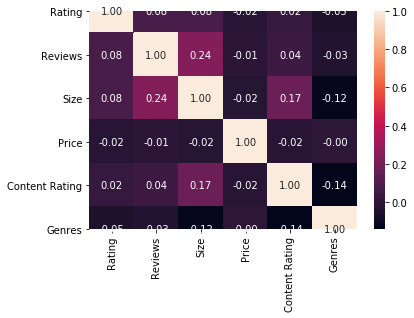

In [0]:
corr=data.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

# Modelling

In [0]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

### Data Target

In [0]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [0]:
pd.value_counts(pd.Series(Y))

Popular             3153
Ordinary            2968
Not Popular         2095
Very Not Popular     531
Very popular         388
dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity')]

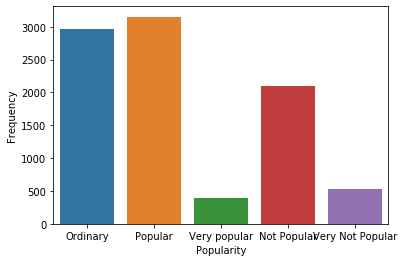

In [0]:
sns.countplot(data.Popularity).set(xlabel='Popularity', ylabel='Frequency')

### Balancing Data

In [0]:
y_train.shape

(7308,)

In [0]:
x_train.shape

(7308, 6)

In [0]:
sm=SMOTE(random_state=123)
x_train_re,y_train_re=sm.fit_resample(x_train,y_train)

In [0]:
pd.value_counts(pd.Series(y_train))

Popular             2523
Ordinary            2374
Not Popular         1676
Very Not Popular     425
Very popular         310
dtype: int64

In [0]:
pd.value_counts(pd.Series(y_train_re))

Not Popular         2523
Very Not Popular    2523
Ordinary            2523
Very popular        2523
Popular             2523
dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity (After Balancing)')]

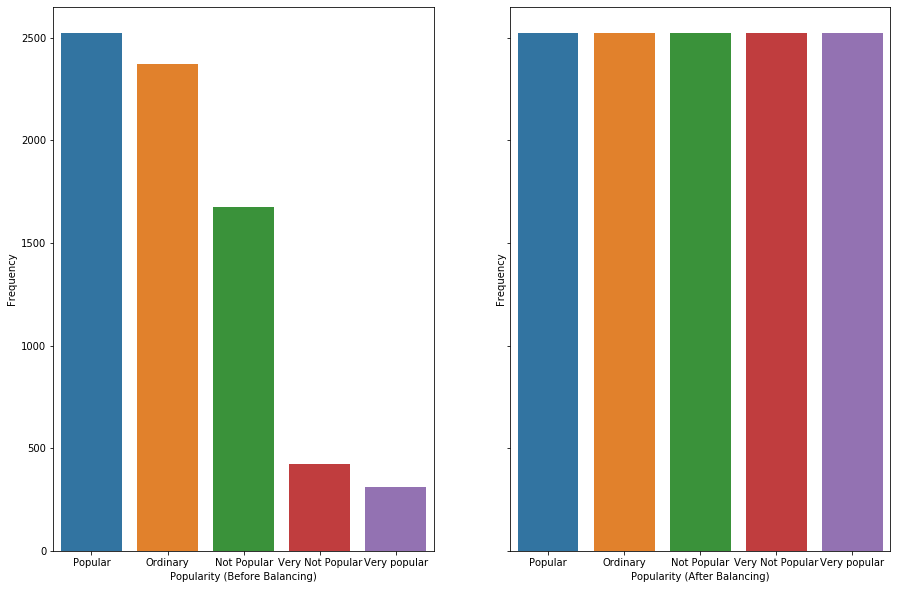

In [0]:
f,axes=plt.subplots(1,2,figsize=(15,10),sharex=True,sharey=True)

sns.countplot(y_train,ax=axes[0]).set(xlabel='Popularity (Before Balancing)', ylabel='Frequency')
sns.countplot(y_train_re,ax=axes[1]).set(xlabel='Popularity (After Balancing)', ylabel='Frequency')

# Experiment

## KNN Models

### Training and Testing Model

#### Find the Best Parameter for KNN Model

In [0]:
paramknn={
    'n_neighbors':[5,6,7,8,9,10],
    'leaf_size':[1,2,3,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree','kd_tree','brute'],
    'n_jobs':[-1]
}

In [0]:
knn_parameters=[]

In [0]:
modelknn=KNeighborsClassifier(n_jobs=-1)

In [0]:
modelknn_best=GridSearchCV(modelknn,param_grid=paramknn,n_jobs=-1)
modelknn_best.fit(x_train,y_train)
knn_parameters.append(modelknn_best.best_params_)
knn_parameters[0]

{'algorithm': 'auto',
 'leaf_size': 2,
 'n_jobs': -1,
 'n_neighbors': 10,
 'weights': 'distance'}

In [0]:
modelknn_re_best=GridSearchCV(modelknn,param_grid=paramknn,n_jobs=-1)
modelknn_re_best.fit(x_train_re,y_train_re)
knn_parameters.append(modelknn_re_best.best_params_)
knn_parameters[1]

{'algorithm': 'brute',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [0]:
# def modelknn(parameter,i):
#     modell=KNeighborsClassifier(n_jobs=-1)
#     parameters=parameter[i].values
#     model=GridSearchCV(modell,param_grid=parameters,n_jobs=-1)
#     return model

def modelknn(n,l,w,a,j):
    model=KNeighborsClassifier(n_neighbors=n,leaf_size=l,weights=w,algorithm=a,n_jobs=j)
    return model

In [0]:
model_knn=[]

In [0]:
# model_knn.append(modelknn(knn_parameters,0))

model_knn.append(modelknn(10,2,'distance','auto',-1))

In [0]:
train=model_knn[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("KNN (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

KNN (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.76      0.79      0.77       419
        Ordinary       0.82      0.83      0.82       594
         Popular       0.89      0.89      0.89       630
Very Not Popular       0.55      0.40      0.46       106
    Very popular       0.85      0.85      0.85        78

        accuracy                           0.82      1827
       macro avg       0.77      0.75      0.76      1827
    weighted avg       0.81      0.82      0.81      1827



Confusion Matrix:

[[329  55   0  35   0]
 [ 41 492  61   0   0]
 [  0  55 563   0  12]
 [ 64   0   0  42   0]
 [  0   1  11   0  66]]


In [0]:
train_re=model_knn[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.74      0.68      0.70       419
        Ordinary       0.82      0.79      0.81       594
         Popular       0.90      0.84      0.87       630
Very Not Popular       0.43      0.64      0.51       106
    Very popular       0.62      0.94      0.75        78

        accuracy                           0.78      1827
       macro avg       0.70      0.78      0.73      1827
    weighted avg       0.80      0.78      0.78      1827



Confusion Matrix:

[[283  46   0  90   0]
 [ 64 472  57   1   0]
 [  0  58 528   0  44]
 [ 38   0   0  68   0]
 [  0   1   4   0  73]]


In [0]:
model_knn.append(modelknn(7,1,'distance','brute',-1))

In [0]:
train_2=model_knn[1].fit(x_train,y_train)
predicted_2=train_2.predict(x_test)
print("KNN (Before Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

KNN (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.75      0.77      0.76       419
        Ordinary       0.81      0.82      0.82       594
         Popular       0.88      0.89      0.88       630
Very Not Popular       0.51      0.38      0.43       106
    Very popular       0.84      0.85      0.84        78

        accuracy                           0.81      1827
       macro avg       0.76      0.74      0.75      1827
    weighted avg       0.80      0.81      0.81      1827



Confusion Matrix:

[[324  56   0  39   0]
 [ 41 487  66   0   0]
 [  0  57 560   0  13]
 [ 66   0   0  40   0]
 [  0   1  11   0  66]]


In [0]:
train_re_2=model_knn[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re_2.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.75      0.66      0.70       419
        Ordinary       0.81      0.80      0.80       594
         Popular       0.89      0.83      0.86       630
Very Not Popular       0.43      0.66      0.52       106
    Very popular       0.62      0.94      0.74        78

        accuracy                           0.78      1827
       macro avg       0.70      0.78      0.73      1827
    weighted avg       0.79      0.78      0.78      1827



Confusion Matrix:

[[278  51   0  90   0]
 [ 59 473  61   1   0]
 [  0  59 526   0  45]
 [ 36   0   0  70   0]
 [  0   1   4   0  73]]


### KFold

In [0]:
def kfoldknnclass(x,y,n):
    for i in range(len(model_knn)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_knn[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not balanced')
        print('=================')
        print('Parameter:',knn_parameters[i],'\n')
        print('Hasil dari model KNN:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldknnclass(X,Y,5)

Not balanced
Parameter: {'algorithm': 'auto', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8445539135194308
Subset 1 f1 score= 0.8461557398973909
Subset 2 accuracy=  0.8319649698960043
Subset 2 f1 score= 0.8263070876379154
Subset 3 accuracy=  0.7586206896551724
Subset 3 f1 score= 0.7591120993687734
Subset 4 accuracy=  0.7848932676518884
Subset 4 f1 score= 0.780589182981329
Subset 5 accuracy=  0.789272030651341
Subset 5 f1 score= 0.7842931327982124


Average Accuracy=  0.8018609742747674
Average F1 Score=  0.7992914485367242


Confusion Matrix:
 [[467  70   0  42   0]
 [ 58 521  56   0   1]
 [  0  41 369   0   8]
 [104   0   0  70   0]
 [  0   0   5   0  15]]



Not balanced
Parameter: {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8418171866447729
Subset 1 f1 score= 0.8435532821682452
Subset 2 accuracy=  0.82868089764641

In [0]:
def kfoldknnclass_re(x,y,n):
    for i in range(len(model_knn)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_knn[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',knn_parameters[i],'\n')
        print('Hasil dari model KNN:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldknnclass_re(X,Y,5)

Balanced
Parameter: {'algorithm': 'auto', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8237547892720306
subset 1 f1 score= 0.8267353643425251
Subset 2 accuracy=  0.8056923918992884
subset 2 f1 score= 0.8079135421447345
Subset 3 accuracy=  0.7323481116584565
subset 3 f1 score= 0.7425524711167146
Subset 4 accuracy=  0.7542419266557198
subset 4 f1 score= 0.7609052302768805
Subset 5 accuracy=  0.7629994526546251
subset 5 f1 score= 0.7688162314966768


Average Accuracy=  0.7758073344280241
Average F1 Score=  0.7813845678755063


Confusion Matrix:
 [[392  49   0 138   0]
 [ 80 508  47   0   1]
 [  0  46 350   0  22]
 [ 48   0   0 126   0]
 [  0   0   2   0  18]]



Balanced
Parameter: {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8111658456486043
subset 1 f1 score= 0.8146905361062797
Subset 2 accuracy=  0.8029556650246306
sub

## Decision Tree Models

### Training and Testing Model

#### Find the Best Parameter for Decision Tree Model

In [0]:
paramdtree={
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
    'random_state':[123]
}

In [0]:
dtree_parameters=[]

In [0]:
modeldtree=DecisionTreeClassifier(random_state=1234)

In [0]:
modeldtree_best=GridSearchCV(modeldtree,param_grid=paramdtree,n_jobs=-1)
modeldtree_best.fit(x_train,y_train)
dtree_parameters.append(modeldtree_best.best_params_)
dtree_parameters[0]

{'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 123}

In [0]:
modeldtree_re_best=GridSearchCV(modeldtree,param_grid=paramdtree,n_jobs=-1)
modeldtree_re_best.fit(x_train_re,y_train_re)
dtree_parameters.append(modeldtree_re_best.best_params_)
dtree_parameters[1]

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'random_state': 123}

In [0]:
# def modelknn(parameter,i):
#     model=KNeighborsClassifier(n_jobs=-1)
#     model=GridSearchCV(model,param_grid=parameters[i],n_jobs=-1)
#     return model

def modeldtree(f,s,l,r):
    model=DecisionTreeClassifier(max_features=f,min_samples_split=s,min_samples_leaf=l,random_state=r)
    return model

In [0]:
model_dtree=[]

In [0]:
model_dtree.append(modeldtree('auto',2,5,123))

In [0]:
train=model_dtree[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("Decision Tree (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

Decision Tree (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.76      0.78      0.77       419
        Ordinary       0.81      0.81      0.81       594
         Popular       0.89      0.89      0.89       630
Very Not Popular       0.60      0.50      0.54       106
    Very popular       0.84      0.83      0.84        78

        accuracy                           0.82      1827
       macro avg       0.78      0.76      0.77      1827
    weighted avg       0.81      0.82      0.81      1827



Confusion Matrix:

[[328  56   0  35   0]
 [ 52 483  58   1   0]
 [  0  56 562   0  12]
 [ 53   0   0  53   0]
 [  0   0  13   0  65]]


In [0]:
train_re=model_dtree[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("Decision Tree (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

Decision Tree (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.70      0.72       419
        Ordinary       0.79      0.76      0.78       594
         Popular       0.88      0.87      0.87       630
Very Not Popular       0.51      0.68      0.58       106
    Very popular       0.74      0.88      0.81        78

        accuracy                           0.78      1827
       macro avg       0.73      0.78      0.75      1827
    weighted avg       0.79      0.78      0.78      1827



Confusion Matrix:

[[293  61   4  61   0]
 [ 69 452  64   9   0]
 [  3  58 545   0  24]
 [ 34   0   0  72   0]
 [  0   0   9   0  69]]


In [0]:
model_dtree.append(modeldtree('auto',10,1,123))

In [0]:
train_2=model_dtree[1].fit(x_train,y_train)
predicted_2=train_2.predict(x_test)
print("Decision Tree (Before Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

Decision Tree (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.71      0.75      0.73       419
        Ordinary       0.77      0.77      0.77       594
         Popular       0.88      0.88      0.88       630
Very Not Popular       0.57      0.42      0.49       106
    Very popular       0.84      0.85      0.84        78

        accuracy                           0.79      1827
       macro avg       0.75      0.74      0.74      1827
    weighted avg       0.79      0.79      0.79      1827



Confusion Matrix:

[[316  69   0  34   0]
 [ 73 460  61   0   0]
 [  1  61 555   0  13]
 [ 55   6   0  45   0]
 [  0   0  12   0  66]]


In [0]:
train_re_2=model_dtree[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re_2.predict(x_test)
print("Decision Tree (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

Decision Tree (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.71      0.70      0.71       419
        Ordinary       0.78      0.79      0.79       594
         Popular       0.87      0.84      0.85       630
Very Not Popular       0.50      0.52      0.51       106
    Very popular       0.63      0.79      0.70        78

        accuracy                           0.77      1827
       macro avg       0.70      0.73      0.71      1827
    weighted avg       0.77      0.77      0.77      1827



Confusion Matrix:

[[294  72   2  51   0]
 [ 61 468  61   4   0]
 [  9  58 527   0  36]
 [ 50   0   1  55   0]
 [  0   0  16   0  62]]


### KFold

In [0]:
def kfolddtreeclass(x,y,n):
    for i in range(len(model_dtree)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_dtree[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not Balanced')
        print('=================')
        print('Parameter:',dtree_parameters[i],'\n')
        print('Hasil dari model Decision Tree:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfolddtreeclass(X,Y,5)

Not Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8434592227695676
Subset 1 f1 score= 0.8453978213931522
Subset 2 accuracy=  0.8182813355227149
Subset 2 f1 score= 0.8183024815899147
Subset 3 accuracy=  0.7690202517788725
Subset 3 f1 score= 0.7685101052544145
Subset 4 accuracy=  0.7870826491516146
Subset 4 f1 score= 0.7830343259917703
Subset 5 accuracy=  0.7837985769020251
Subset 5 f1 score= 0.7748065333610413


Average Accuracy=  0.800328407224959
Average F1 Score=  0.7980102535180587


Confusion Matrix:
 [[477  71   0  31   0]
 [ 72 526  38   0   0]
 [  4  45 365   0   4]
 [123   0   0  51   0]
 [  0   0   7   0  13]]



Not Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8407224958949097
Subset 1 f1 score= 0.8438384809641608
Subset 2 accurac

In [0]:
def kfolddtreeclass_re(x,y,n):
    for i in range(len(model_dtree)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_dtree[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',dtree_parameters[i],'\n')
        print('Hasil dari model Decision Tree:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfolddtreeclass_re(X,Y,5)

Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.7427476737821566
subset 1 f1 score= 0.7488023985877542
Subset 2 accuracy=  0.80623973727422
subset 2 f1 score= 0.8088531478847452
Subset 3 accuracy=  0.7733990147783252
subset 3 f1 score= 0.7791454016052648
Subset 4 accuracy=  0.7416529830322933
subset 4 f1 score= 0.7445132686764745
Subset 5 accuracy=  0.7843459222769568
subset 5 f1 score= 0.7878993878466167


Average Accuracy=  0.7696770662287903
Average F1 Score=  0.773842720920171


Confusion Matrix:
 [[431  46   2  99   1]
 [ 82 507  43   3   1]
 [  2  40 361   1  14]
 [ 56   0   0 118   0]
 [  0   0   4   0  16]]



Balanced
Parameter: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 123} 

Hasil dari model Decision Tree:

Subset 1 accuracy=  0.8325123152709359
subset 1 f1 score= 0.8371772290157722
Subset 2 accuracy=  0.8024

## Random Forest Models

### Training and Testing Model

#### Find the Best Parameter for Random Forest Model

In [0]:
paramrf={
    'criterion':['gini','entropy'],
    'n_estimators':[10,15,20,25,30],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[3,4,5,6,7], 
    'random_state':[123],
    'n_jobs':[-1]
}

In [0]:
rf_parameters=[]

In [0]:
modelrf=RandomForestClassifier()

In [0]:
modelrf_best=GridSearchCV(modelrf,param_grid=paramrf,n_jobs=-1)
modelrf_best.fit(x_train,y_train)
rf_parameters.append(modelrf_best.best_params_)
rf_parameters[0]

{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 15,
 'n_jobs': -1,
 'random_state': 123}

In [0]:
modelrf_re_best=GridSearchCV(modelrf,param_grid=paramrf,n_jobs=-1)
modelrf_re_best.fit(x_train_re,y_train_re)
rf_parameters.append(modelrf_re_best.best_params_)
rf_parameters[1]

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 30,
 'n_jobs': -1,
 'random_state': 123}

In [0]:
# def modelknn(parameter,i):
#     modell=KNeighborsClassifier(n_jobs=-1)
#     parameters=parameter[i].values
#     model=GridSearchCV(modell,param_grid=parameters,n_jobs=-1)
#     return model

def modelrf(c,e,l,s,r,j):
    model=RandomForestClassifier(criterion=c,n_estimators=e,min_samples_leaf=l,
                                 min_samples_split=s,random_state=r,n_jobs=j)
    return model

In [0]:
model_rf=[]

In [0]:
# model_knn.append(modelknn(knn_parameters,0))

model_rf.append(modelrf('entropy',15,3,3,123,-1))

In [0]:
train=model_rf[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("Random Forest (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

Random Forest (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.78      0.81      0.80       419
        Ordinary       0.86      0.86      0.86       594
         Popular       0.92      0.92      0.92       630
Very Not Popular       0.63      0.52      0.57       106
    Very popular       0.88      0.87      0.88        78

        accuracy                           0.85      1827
       macro avg       0.81      0.80      0.80      1827
    weighted avg       0.85      0.85      0.85      1827



Confusion Matrix:

[[340  47   0  32   0]
 [ 43 510  41   0   0]
 [  0  39 582   0   9]
 [ 51   0   0  55   0]
 [  0   0  10   0  68]]


In [0]:
train_re=model_rf[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("Random Forest (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

Random Forest (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.78      0.76      0.77       419
        Ordinary       0.85      0.85      0.85       594
         Popular       0.93      0.90      0.92       630
Very Not Popular       0.56      0.66      0.60       106
    Very popular       0.81      0.94      0.87        78

        accuracy                           0.84      1827
       macro avg       0.79      0.82      0.80      1827
    weighted avg       0.84      0.84      0.84      1827



Confusion Matrix:

[[320  44   0  55   0]
 [ 52 502  39   1   0]
 [  0  43 570   0  17]
 [ 36   0   0  70   0]
 [  0   0   5   0  73]]


In [0]:
model_rf.append(modelrf('gini',30,1,4,123,-1))

In [0]:
train_2=model_rf[1].fit(x_train,y_train)
predicted_2=train_2.predict(x_test)
print("Random Forest (Before Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

Random Forest (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.78      0.80      0.79       419
        Ordinary       0.85      0.87      0.86       594
         Popular       0.92      0.92      0.92       630
Very Not Popular       0.59      0.49      0.54       106
    Very popular       0.89      0.85      0.87        78

        accuracy                           0.85      1827
       macro avg       0.81      0.78      0.79      1827
    weighted avg       0.84      0.85      0.85      1827



Confusion Matrix:

[[334  50   0  35   0]
 [ 38 515  40   1   0]
 [  0  42 580   0   8]
 [ 54   0   0  52   0]
 [  0   0  12   0  66]]


In [0]:
train_re_2=model_rf[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re_2.predict(x_test)
print("Random Forest (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

Random Forest (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.78      0.78      0.78       419
        Ordinary       0.85      0.86      0.86       594
         Popular       0.94      0.92      0.93       630
Very Not Popular       0.58      0.56      0.57       106
    Very popular       0.87      0.94      0.90        78

        accuracy                           0.85      1827
       macro avg       0.80      0.81      0.81      1827
    weighted avg       0.85      0.85      0.85      1827



Confusion Matrix:

[[327  50   0  42   0]
 [ 47 513  33   1   0]
 [  0  39 580   0  11]
 [ 47   0   0  59   0]
 [  0   0   5   0  73]]


### KFold

In [0]:
def kfoldrfclass(x,y,n):
    for i in range(len(model_rf)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_rf[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not balanced')
        print('=================')
        print('Parameter:',rf_parameters[i],'\n')
        print('Hasil dari model Random Forest:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldrfclass(X,Y,5)

Not balanced
Parameter: {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.8735632183908046
Subset 1 f1 score= 0.8753098125924427
Subset 2 accuracy=  0.8659003831417624
Subset 2 f1 score= 0.8645566685934465
Subset 3 accuracy=  0.8155446086480569
Subset 3 f1 score= 0.8168406751779548
Subset 4 accuracy=  0.8264915161466886
Subset 4 f1 score= 0.8237275186685532
Subset 5 accuracy=  0.8325123152709359
Subset 5 f1 score= 0.8268868425748483


Average Accuracy=  0.8428024083196497
Average F1 Score=  0.8414643035214491


Confusion Matrix:
 [[498  49   0  32   0]
 [ 47 551  38   0   0]
 [  0  30 384   0   4]
 [101   0   0  73   0]
 [  0   0   5   0  15]]



Not balanced
Parameter: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.879584

In [0]:
def kfoldrfclass_re(x,y,n):
    for i in range(len(model_rf)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_rf[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',rf_parameters[i],'\n')
        print('Hasil dari model Random Forest:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldrfclass_re(X,Y,5)

Balanced
Parameter: {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.8768472906403941
subset 1 f1 score= 0.8790413738831654
Subset 2 accuracy=  0.8631636562671046
subset 2 f1 score= 0.8644758568405776
Subset 3 accuracy=  0.8051450465243569
subset 3 f1 score= 0.810180599380624
Subset 4 accuracy=  0.819376026272578
subset 4 f1 score= 0.821408228913684
Subset 5 accuracy=  0.8352490421455939
subset 5 f1 score= 0.8354784985815905


Average Accuracy=  0.8399562123700056
Average F1 Score=  0.8421169115199284


Confusion Matrix:
 [[483  40   0  56   0]
 [ 57 542  36   1   0]
 [  0  35 373   0  10]
 [ 64   0   0 110   0]
 [  0   0   2   0  18]]



Balanced
Parameter: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123} 

Hasil dari model Random Forest:

Subset 1 accuracy=  0.8762999452654625


## Naive Bayes

### Training dan Testing

#### Find the Best Parameter for Naive Bayes Model

In [0]:
paramnaive={
    'priors':[None],
    'var_smoothing':[1e-09,1e-05,2e-09,3e-09,5e-09]
}

In [0]:
naive_parameters=[]

In [0]:
modelnaive=GaussianNB()

In [0]:
modelnaive_best=GridSearchCV(modelnaive,param_grid=paramnaive,n_jobs=-1)
modelnaive_best.fit(x_train,y_train)
naive_parameters.append(modelnaive_best.best_params_)
naive_parameters[0]

{'priors': None, 'var_smoothing': 1e-09}

In [0]:
modelnaive_re_best=GridSearchCV(modelnaive,param_grid=paramnaive,n_jobs=-1)
modelnaive_re_best.fit(x_train_re,y_train_re)
naive_parameters.append(modelnaive_re_best.best_params_)
naive_parameters[1]

{'priors': None, 'var_smoothing': 1e-09}

In [0]:
def modelnaivebayes(prior,var_smooth):
    model=GaussianNB(priors=prior,var_smoothing=var_smooth)
    return model

In [0]:
model_naive=[]

In [0]:
model_naive.append(modelnaivebayes(None,1e-09))

In [0]:
train=model_naive[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("Naive Bayes (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

Naive Bayes (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.54      0.99      0.70       419
        Ordinary       0.72      0.57      0.63       594
         Popular       0.95      0.77      0.85       630
Very Not Popular       0.00      0.00      0.00       106
    Very popular       0.82      0.86      0.84        78

        accuracy                           0.71      1827
       macro avg       0.61      0.64      0.60      1827
    weighted avg       0.72      0.71      0.69      1827



Confusion Matrix:

[[415   1   0   3   0]
 [242 336  16   0   0]
 [  1 131 483   0  15]
 [106   0   0   0   0]
 [  0   1  10   0  67]]


In [0]:
train_re=model_naive[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("Naive Bayes (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

Naive Bayes (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.12      0.07      0.09       419
        Ordinary       0.68      0.48      0.56       594
         Popular       0.96      0.75      0.84       630
Very Not Popular       0.18      1.00      0.31       106
    Very popular       0.75      0.90      0.82        78

        accuracy                           0.53      1827
       macro avg       0.54      0.64      0.52      1827
    weighted avg       0.62      0.53      0.55      1827



Confusion Matrix:

[[ 29   1   0 389   0]
 [217 284  15  78   0]
 [  2 131 474   0  23]
 [  0   0   0 106   0]
 [  0   1   7   0  70]]


### KFold

In [0]:
def kfoldnaiveclass(x,y,n):
    for i in range(len(model_naive)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_naive[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Not Balanced')
        print('=================')
        print('Parameter:',naive_parameters[i],'\n')
        print('Hasil dari model Naive Bayes:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
                        
            model.fit(X_train,Y_train)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('Subset',j+1,'f1 score=',f1_scores[j])
            j+=1
            
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldnaiveclass(X,Y,5)

Not Balanced
Parameter: {'priors': None, 'var_smoothing': 1e-09} 

Hasil dari model Naive Bayes:

Subset 1 accuracy=  0.7536945812807881
Subset 1 f1 score= 0.7637672843177205
Subset 2 accuracy=  0.7263273125342091
Subset 2 f1 score= 0.7311088602873101
Subset 3 accuracy=  0.6978653530377669
Subset 3 f1 score= 0.6690208948165416
Subset 4 accuracy=  0.6995073891625616
Subset 4 f1 score= 0.666383763538018
Subset 5 accuracy=  0.6694033935413246
Subset 5 f1 score= 0.6335658755670062


Average Accuracy=  0.7093596059113301
Average F1 Score=  0.6927693357053192


Confusion Matrix:
 [[579   0   0   0   0]
 [296 333   7   0   0]
 [  0 111 299   0   8]
 [174   0   0   0   0]
 [  0   0   8   0  12]]





In [0]:
def kfoldnaiveclass_re(x,y,n):
    for i in range(len(model_naive)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_naive[i]
        j=0
        accuracy=[]
        f1_scores=[]
        print('Balanced')
        print('=================')
        print('Parameter:',naive_parameters[i],'\n')
        print('Hasil dari model Naive Bayes:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            f1_scores.append(f1_score(Y_test,Y_pred,average='weighted'))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            print('subset',j+1,'f1 score=',f1_scores[j])
            j+=1
        
        print('\n')
        print('Average Accuracy= ',np.mean(accuracy))
        print('Average F1 Score= ',np.mean(f1_scores))
        print('\n')
        print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
        print('\n\n')

In [0]:
kfoldnaiveclass_re(X,Y,5)

Balanced
Parameter: {'priors': None, 'var_smoothing': 1e-09} 

Hasil dari model Naive Bayes:

Subset 1 accuracy=  0.6869184455391352
subset 1 f1 score= 0.7191083861697086
Subset 2 accuracy=  0.6595511767925561
subset 2 f1 score= 0.6882823928082262
Subset 3 accuracy=  0.4428024083196497
subset 3 f1 score= 0.46366778621916377
Subset 4 accuracy=  0.4482758620689655
subset 4 f1 score= 0.46030406857878237
Subset 5 accuracy=  0.4318555008210181
subset 5 f1 score= 0.4346993033788781


Average Accuracy=  0.5338806787082649
Average F1 Score=  0.5532123874309518


Confusion Matrix:
 [[ 23   0   0 556   0]
 [234 283   7 112   0]
 [  0 111 296   0  11]
 [  2   0   0 172   0]
 [  0   0   5   0  15]]



